![](./attachments/prob_models_continuous_examples_panel.png)

# Section 2.6 — Inventory of continuous distributions

This notebook contains all the code examples from [Section 2.6 Inventory of continuous distributions](https://minireference.com/static/excerpts/noBSstats/noBSstats_ch02_PROB.pdf#page=166) of the **No Bullshit Guide to Statistics**.


#### Notebook setup

In [1]:
# load Python modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Figures setup
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc={'figure.figsize': (7,4)},
)

%config InlineBackend.figure_format = 'retina'

In [3]:
# set random seed for repeatability
np.random.seed(42)

In [4]:
%pip install ministats


[notice] A new release of pip is available: 23.0 -> 24.0
[notice] To update, run: pip3.9 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
from ministats import plot_pdf
from ministats import plot_cdf
from ministats import plot_pdf_and_cdf

## Review of formulas

### Gamma function

In [6]:
from scipy.special import gamma as gammaf

gammaf(1)  # = 0! = 1

1.0

In [7]:
gammaf(2)  # = 1! = 1

1.0

In [8]:
gammaf(3)  # = 2! = 2*1

2.0

In [9]:
gammaf(4)  # = 3! = 3*2*1

6.0

In [10]:
gammaf(5)  # = 4! = 4*3*2*1

24.0

In [11]:
[gammaf(z) for z in [4, 4.1, 4.5, 4.9, 5]]

[6.0, 6.812622863016677, 11.63172839656745, 20.66738596185786, 24.0]

Text(0.5, 0, 'z')

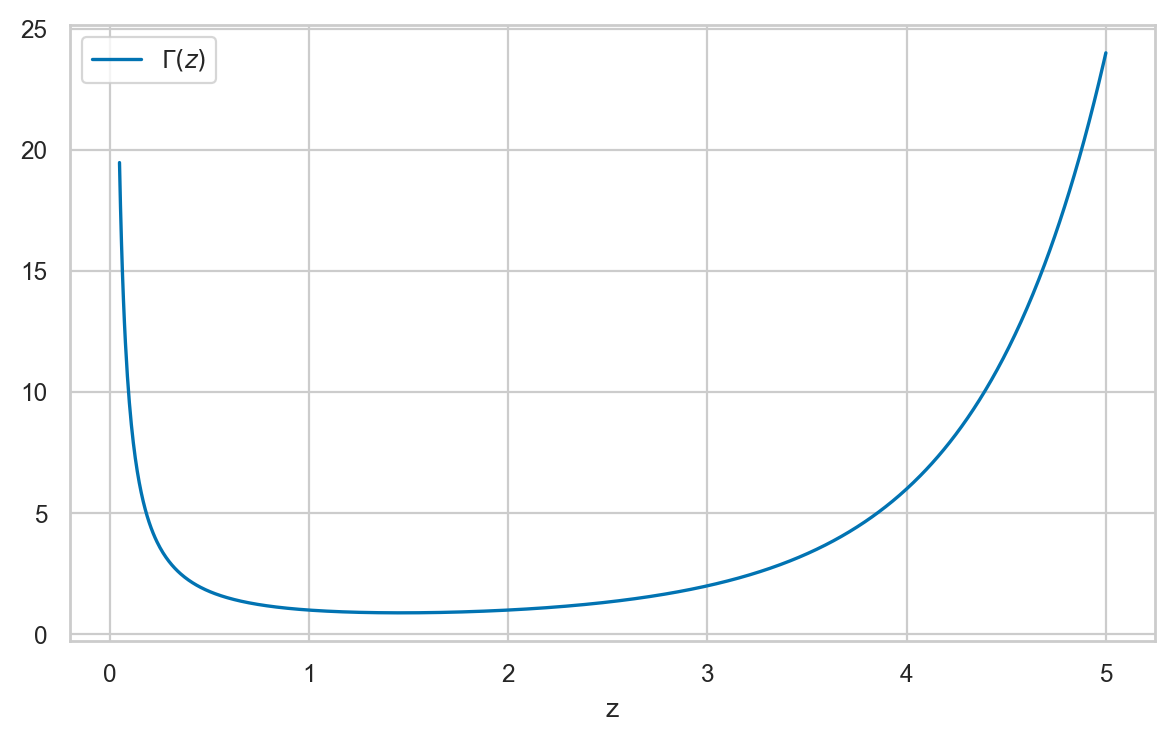

In [12]:
# plot gammaf between 0 and 5
xs = np.linspace(0.05, 5, 1000)
fXs = gammaf(xs)

ax = sns.lineplot(x=xs, y=fXs, label="$\\Gamma(z)$")
ax.set_xlabel("z")

## Continuous distribution reference

### Uniform distribution

The [uniform distribution](https://en.wikipedia.org/wiki/Continuous_uniform_distribution) $\mathcal{U}(\alpha,\beta)$
is described by the following probability density function:

$$
  p_X(x) =
  \begin{cases}
      \frac{1}{\beta-\alpha}  & \textrm{for } \alpha \leq x \leq \beta, \\
      0                       & \textrm{for } x<0 \textrm{ or } x>1.
  \end{cases}
$$

For a uniform distribution $\mathcal{U}(\alpha,\beta)$,
each $x$ between $\alpha$ and $\beta$ is equally likely to occur,
and values of $x$ outside this range have zero probability of occurring.

In [13]:
from scipy.stats import uniform
alpha = 2
beta = 7
rvU = uniform(alpha, beta-alpha)

In [14]:
# draw 10 random samples from X
rvU.rvs(10)

array([3.87270059, 6.75357153, 5.65996971, 4.99329242, 2.7800932 ,
       2.7799726 , 2.29041806, 6.33088073, 5.00557506, 5.54036289])

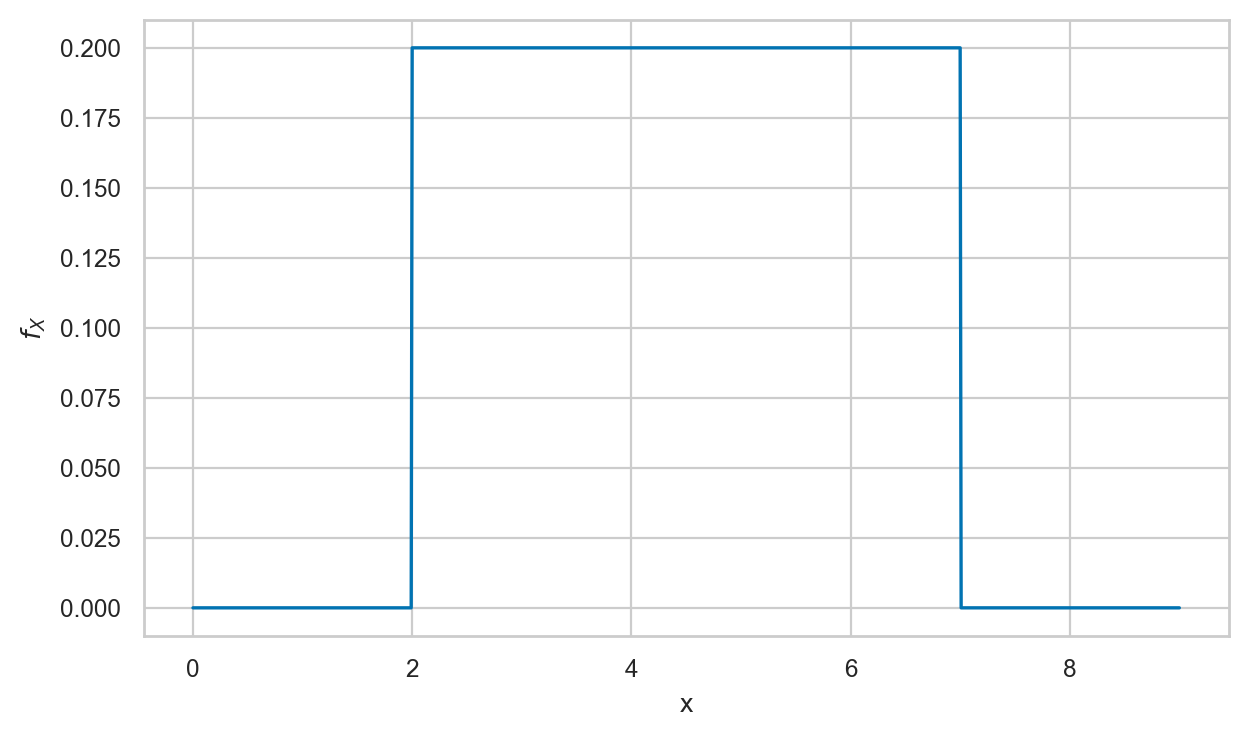

In [15]:
plot_pdf(rvU, xlims=[0,9]);

In [16]:
# # ALT. use sns.lineplot
# # plot the probability density function (pdf) of the random variable X
# xs = np.linspace(0, 10, 1000)
# fUs = rvU.pdf(xs)
# sns.lineplot(x=xs, y=fUs)

#### Cumulative distribution function

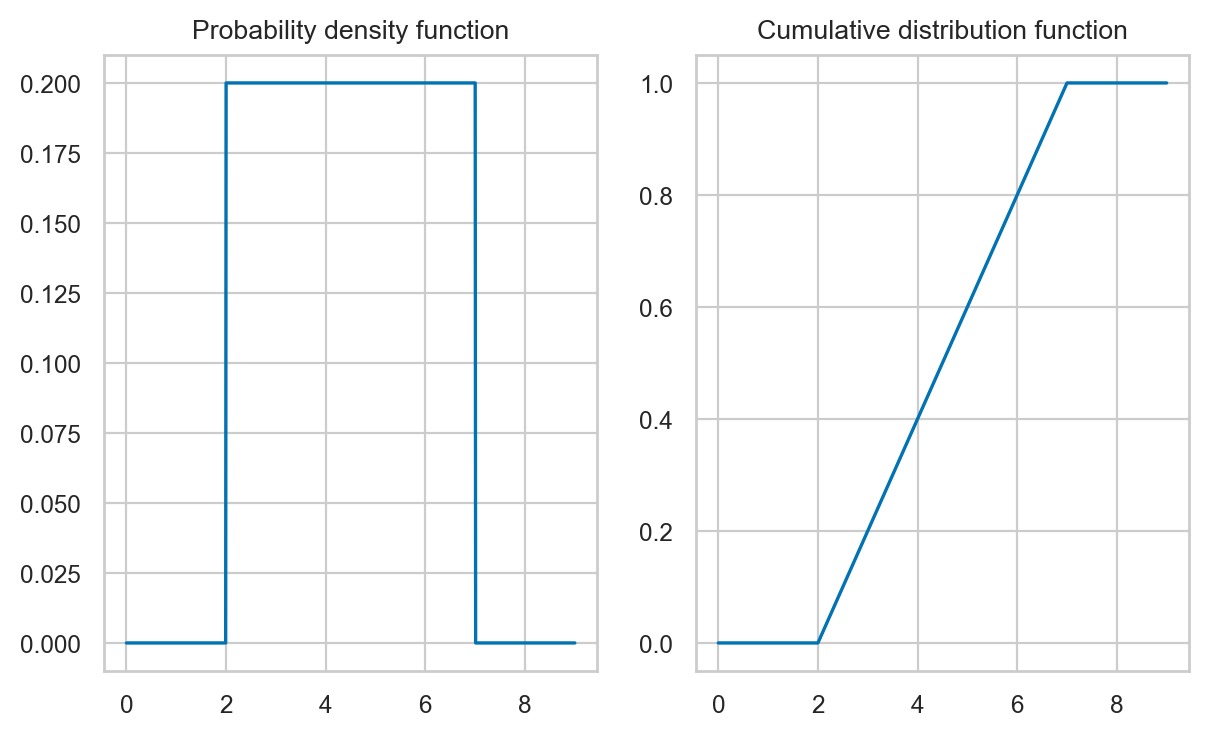

In [17]:
plot_pdf_and_cdf(rvU, xlims=[0,9]);

#### Standard uniform distribution

The standard uniform distribution $U_s \sim \mathcal{U}(0,1)$ is described by the following probability density function:

$$
  p_U(x) =
  \begin{cases}
      1 & \textrm{for } 0 \leq x \leq 1, \\
      0 & \textrm{for } x<0 \textrm{ or } x>1.
  \end{cases}
$$

where $U$ is the name of the random variable and $u$ are particular values it can take on.

The above equation describes tells you how likely it is to observe $\{U_s=x\}$.
For a uniform distribution $\mathcal{U}(0,1)$, each $x$ between 0 and 1 is equally likely to occur,
and values of $x$ outside this range have zero probability of occurring.

In [18]:
from scipy.stats import uniform

rvUs = uniform(0, 1)

In [19]:
# draw 10 random samples from X
rvUs.rvs(1)

array([0.02058449])

In [20]:
import random

random.seed(3)

In [21]:
random.random()

0.23796462709189137

In [22]:
random.uniform(0,1)

0.5442292252959519

In [23]:
import numpy as np
np.random.seed(42)
np.random.rand(10)

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
       0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258])

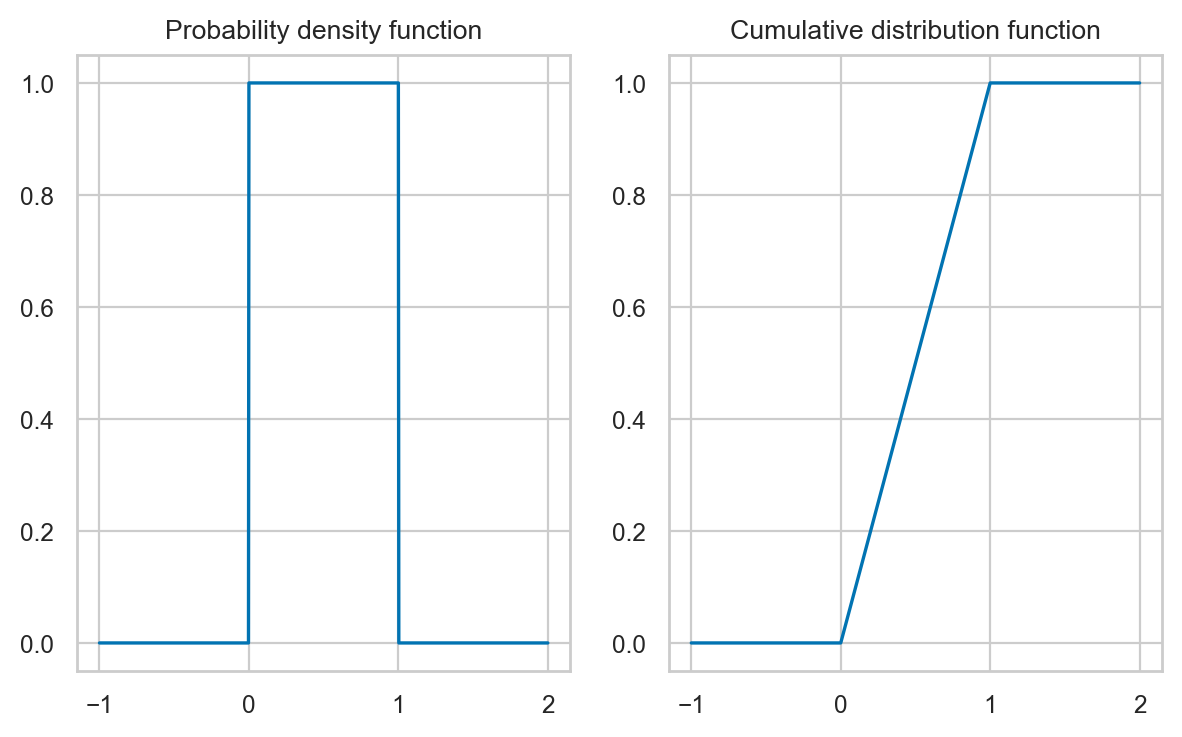

In [24]:
plot_pdf_and_cdf(rvUs, xlims=[-1,2]);

#### Simulating other random variables

We can use the uniform random variable to generate random variables from other distributions.
For example,
suppose we want to generate observations of a coin toss random variable
which comes out `heads` 50\% of the time and `tails` 50\% of the time.

We can use the standard uniform random variables obtained from `random.random()`
and split the outcomes at the "halfway point" of the sample space,
to generate the 50-50 randomness of a coin toss.
The function `flip_coin` defined below shows how to do this:

In [25]:
def flip_coin():
    u = random.random()  # random number in [0,1]
    if u < 0.5:
        return "heads"
    else:
        return "tails"

In [26]:
# simulate one coin toss
flip_coin()

'heads'

In [27]:
# simulate 10 coin tosses
[flip_coin() for i in range(0,10)]

['tails',
 'tails',
 'heads',
 'heads',
 'tails',
 'heads',
 'heads',
 'tails',
 'heads',
 'tails']

### Exponential

In [28]:
from scipy.stats import expon
lam = 7
loc = 0
scale = 1/lam
rvE = expon(loc, scale)

The computer model `expon` accepts as its first argument an optional "location" parameter,
which can shift the exponential distribution to the right,
but we want `loc=0` to get the simple case,
that corresponds to the un-shifted distribution $\textrm{Expon}(\lambda)$.

In [29]:
rvE.mean(), rvE.var()

(0.14285714285714285, 0.02040816326530612)

In [30]:
# math formulas for mean and var
1/lam, 1/lam**2

(0.14285714285714285, 0.02040816326530612)

In [31]:
## ALT. we can obtain mean and ver using the .stats() method
##      The code below also computes the skewness and the kurtosis
# mean, var, skew, kurt = rvE.stats(moments='mvsk')
# mean, var, skew, kurt

In [32]:
# f_E(5) = pdf value at x=10
rvE.pdf(0.2)

1.7261787475912451

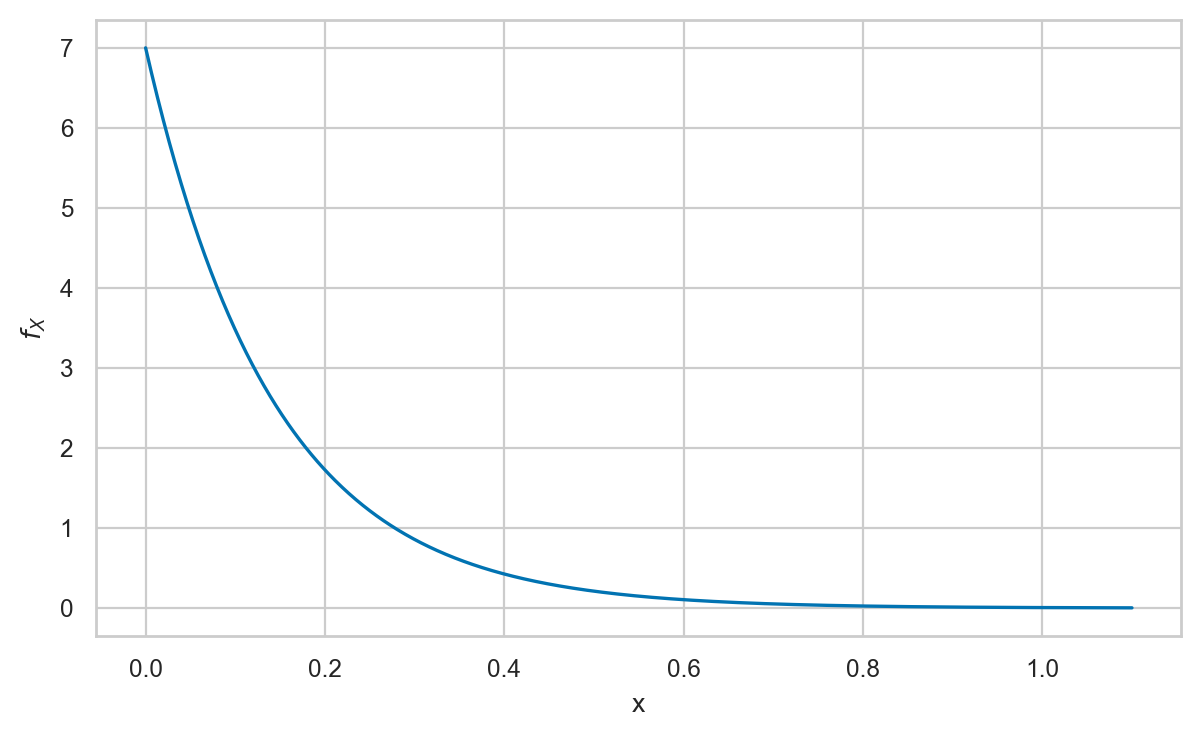

In [33]:
plot_pdf(rvE, xlims=[0,1.1]);

### Normal

A random variable $N$ with a [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) 
$\mathcal{N}(\mu,\sigma)$ is described by the probability density function:

$$
  f_N(x) = \tfrac{1}{\sigma\sqrt{2\pi}} e^{\small -\tfrac{(x-\mu)^2}{2\sigma^2}}.
$$

The mean $\mu$ and the standard deviation $\sigma$ are called the parameters of the distribution.
The math notation $\mathcal{N}(\mu, \sigma)$ is used to describe the whole family of normal probability distributions.


In [34]:
from scipy.stats import norm

mu = 10    # = 𝜇   where is the centre?
sigma = 3  # = 𝜎   how spread out is it?

rvN = norm(mu, sigma)

In [35]:
rvN.mean(), rvN.var()

(10.0, 9.0)

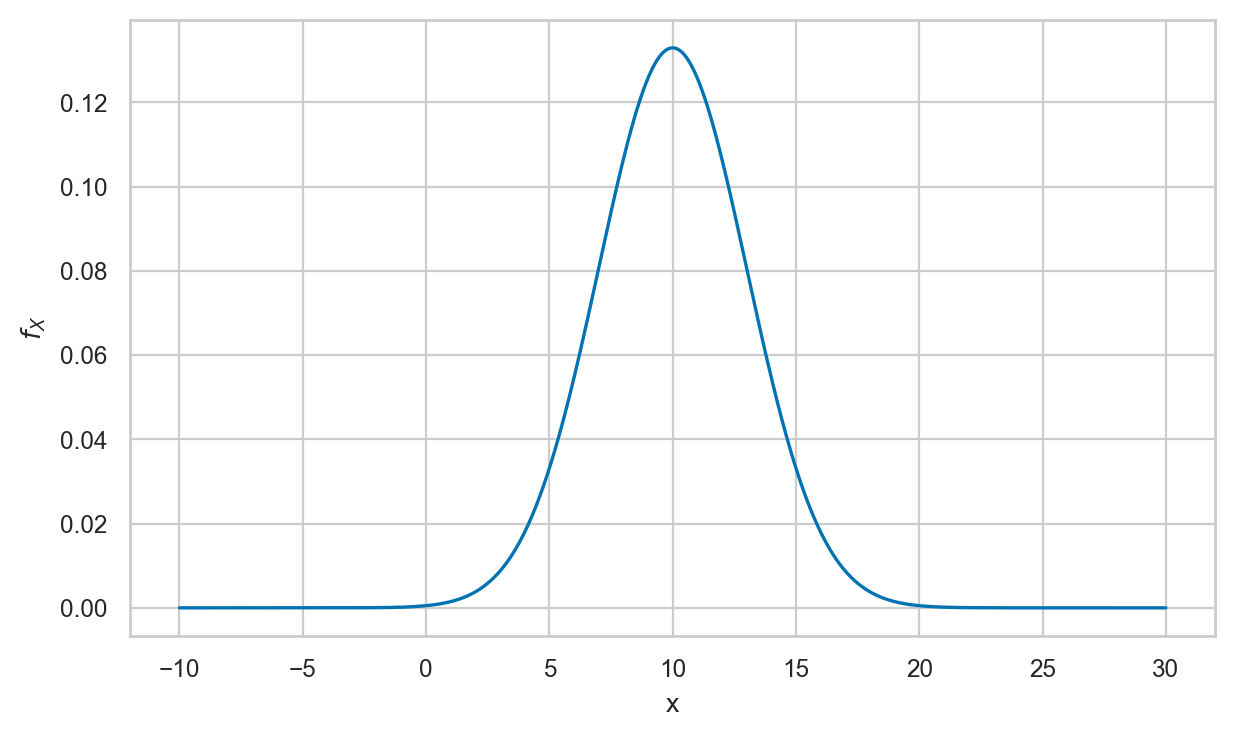

In [36]:
plot_pdf(rvN, xlims=[-10,30]);

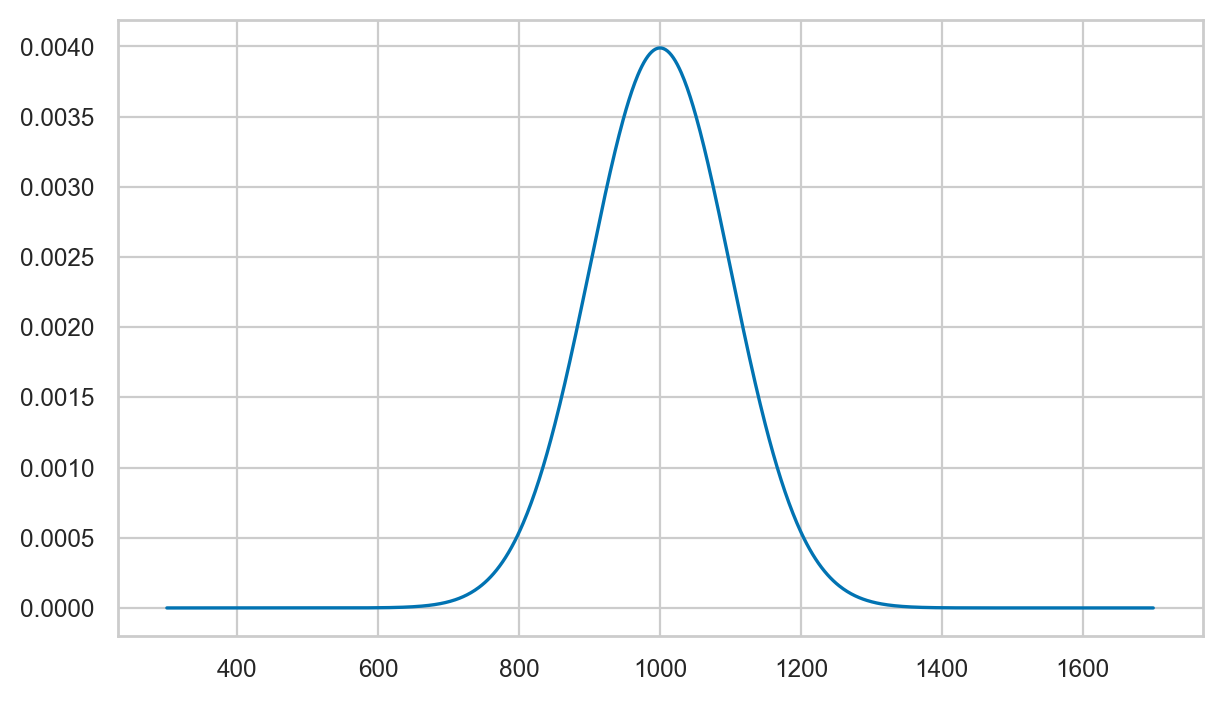

In [37]:
# ALT. generate the plot manually

# create a normal random variable
from scipy.stats import norm
mean = 1000   # 𝜇 (mu)    = where is its center?
std = 100     # 𝜎 (sigma) = how spread out is it?
rvN = norm(mean, std)

# plot its probability density function (pdf)
xs = np.linspace(300, 1700, 1000)
ys = rvN.pdf(xs)
ax = sns.lineplot(x=xs, y=ys)

### Standard normal

A standard normal is denoted $Z$ with a [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) 
$\mathcal{N}(\mu=0,\sigma=1)$ and described by the probability density function:

$$
    f_Z(z) = \tfrac{1}{\sqrt{2\pi}} e^{\small -\tfrac{z^2}{2}}.
$$


In [38]:
from scipy.stats import norm

rvZ = norm(0,1)

In [39]:
rvZ.mean(), rvZ.var()

(0.0, 1.0)

<Axes: xlabel='z', ylabel='$f_{Z}$'>

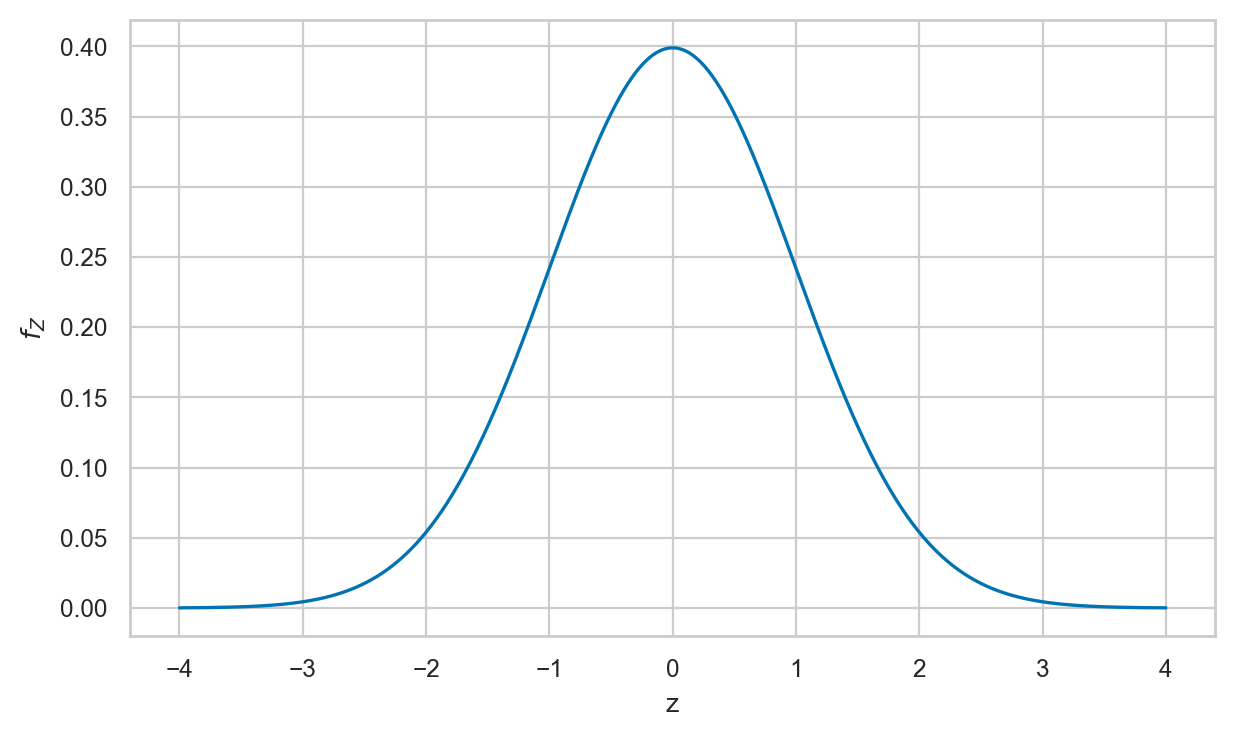

In [40]:
fig, ax = plt.subplots()

plot_pdf(rvZ, xlims=[-4,4], ax=ax, rv_name="Z")


#### Cumulative probabilities in the tails

Probability of $Z$ being smaller than $-2.2$.

In [41]:
rvZ.cdf(-2.3)

0.010724110021675809

Probability of $Z$ being greater than $2.2$.

In [42]:
1 - rvZ.cdf(2.3)

0.010724110021675837

Probability of $|Z| > 2.2$.

In [43]:
rvZ.cdf(-2.3) + (1-rvZ.cdf(2.3))

0.021448220043351646

In [44]:
norm.cdf(-2.3,0,1) + (1-norm.cdf(2.3,0,1))

0.021448220043351646

#### Inverse cumulative distribution calculations

In [45]:
rvZ.ppf(0.05)

-1.6448536269514729

In [46]:
rvZ.ppf(0.95)

1.6448536269514722

In [47]:
rvZ.interval(0.9)

(-1.6448536269514729, 1.6448536269514722)

### Student's $t$-distribution

This is a generalization of the standard normal with "heavy" tails.

In [48]:
from scipy.stats import t

df = 10
rvT = t(df)

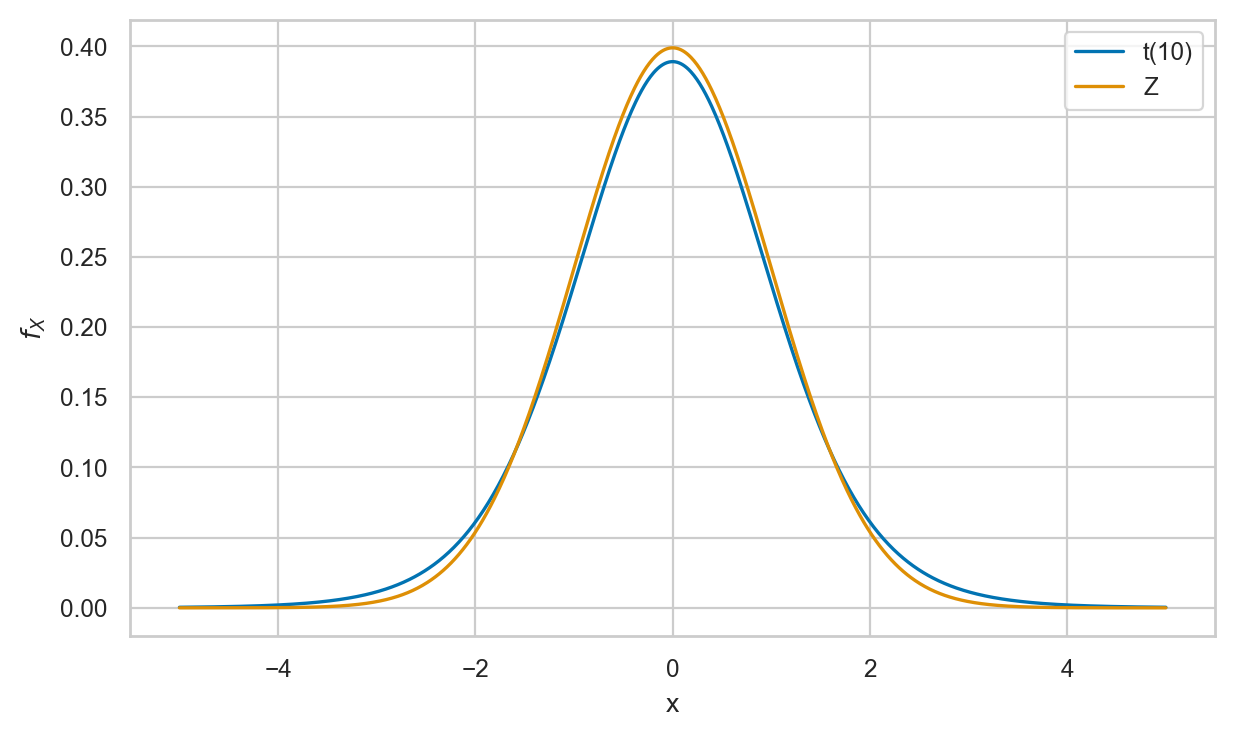

In [49]:
ax = plot_pdf(rvT, xlims=[-5,5], label=f"t({df})")
plot_pdf(rvZ, xlims=[-5,5], ax=ax, label="Z");

In [50]:
rvT.mean(), rvT.var()

(0.0, 1.25)

In [51]:
# Kurtosis formula  kurt(rvT) = 6/(df-4) for df>4
rvT.stats("k")

1.0

In [52]:
rvT.cdf(-2.3)

0.022127156642143552

In [53]:
rvT.ppf(0.05), rvT.ppf(0.95)

(-1.8124611228107341, 1.8124611228107335)

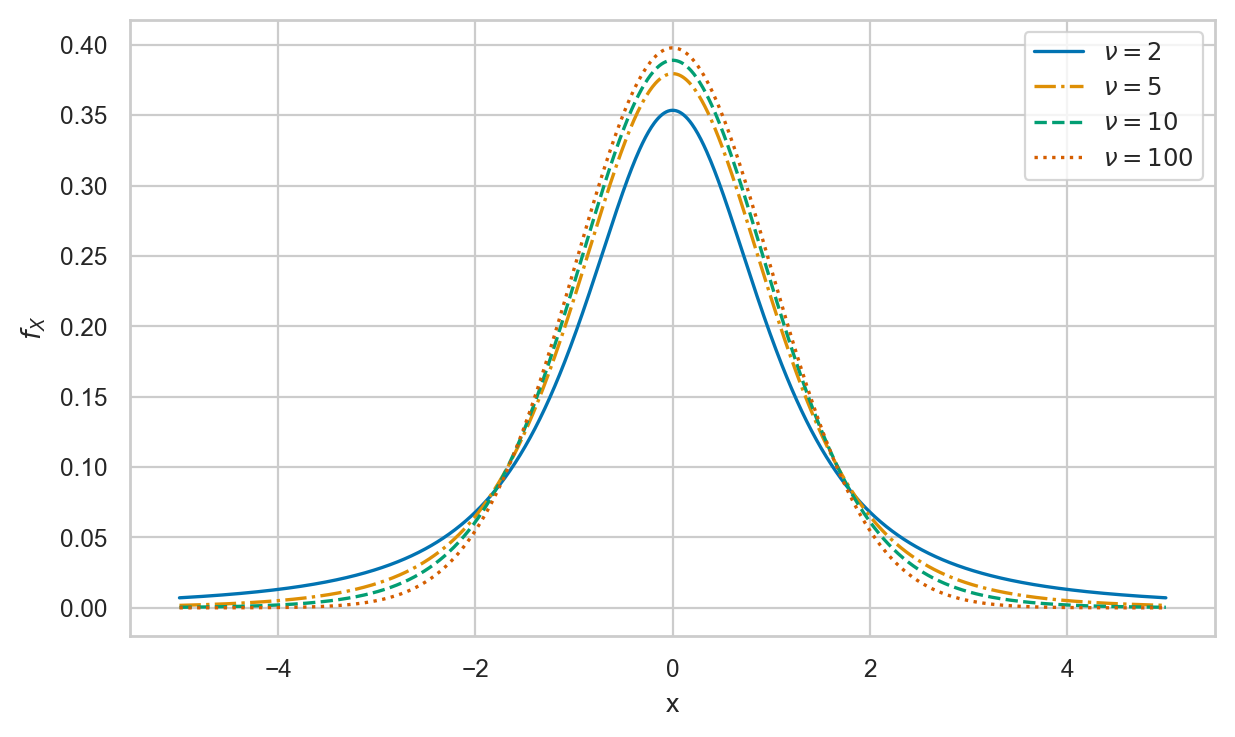

In [54]:
fig, ax = plt.subplots()

linestyles = ['solid', 'dashdot', 'dashed', 'dotted']

for i, df in enumerate([2,5,10,100]):
    rvT = t(df)
    linestyle = linestyles[i]
    plot_pdf(rvT, xlims=[-5,5], ax=ax, label="$\\nu={}$".format(df), linestyle=linestyle)

### Snedecor's $F$-distribution

In [55]:
from scipy.stats import f

df1, df2 = 15, 10
rvF = f(df1, df2)

In [56]:
rvF.mean(), rvF.var()

(1.25, 0.7986111111111112)

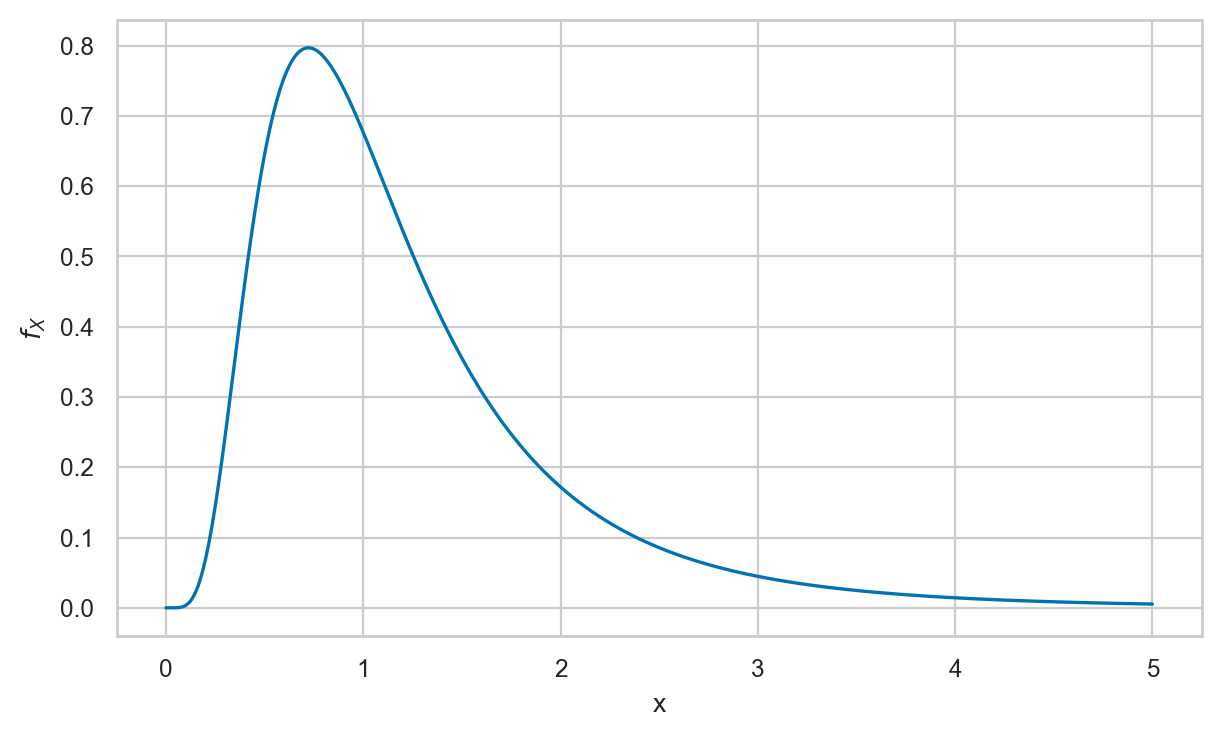

In [57]:
plot_pdf(rvF, xlims=[0,5]);

### Chi-squared distribution

In [58]:
from scipy.stats import chi2

k = 10
rvX2 = chi2(k)

In [59]:
rvX2.mean(), rvX2.var()

(10.0, 20.0)

In [60]:
1 - rvX2.cdf(20)

0.02925268807696113

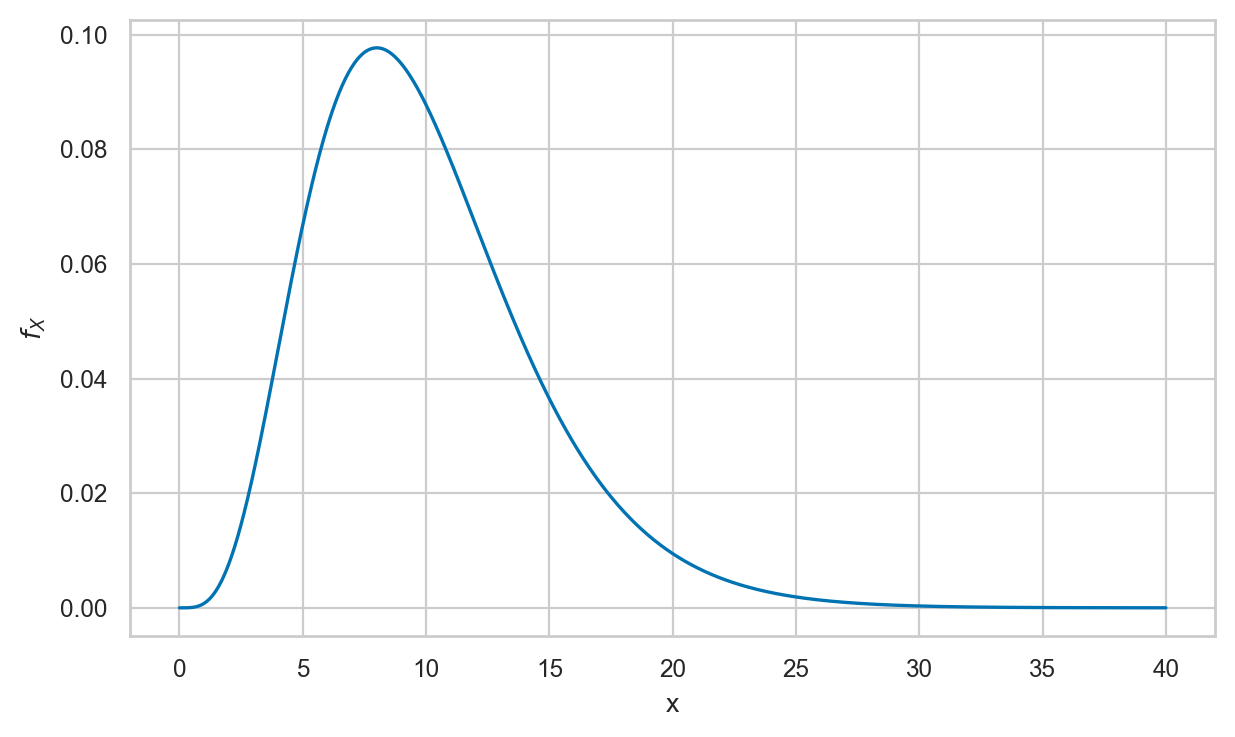

In [61]:
plot_pdf(rvX2, xlims=[0,40]);

### Gamma (optional)

https://en.wikipedia.org/wiki/Gamma_distribution

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html

In [62]:
from scipy.stats import gamma as gammad

alpha = 4
loc = 0
lam = 2
beta = 1/lam

rvG = gammad(alpha, loc, beta)

In [63]:
rvG.mean(), rvG.var()

(2.0, 1.0)

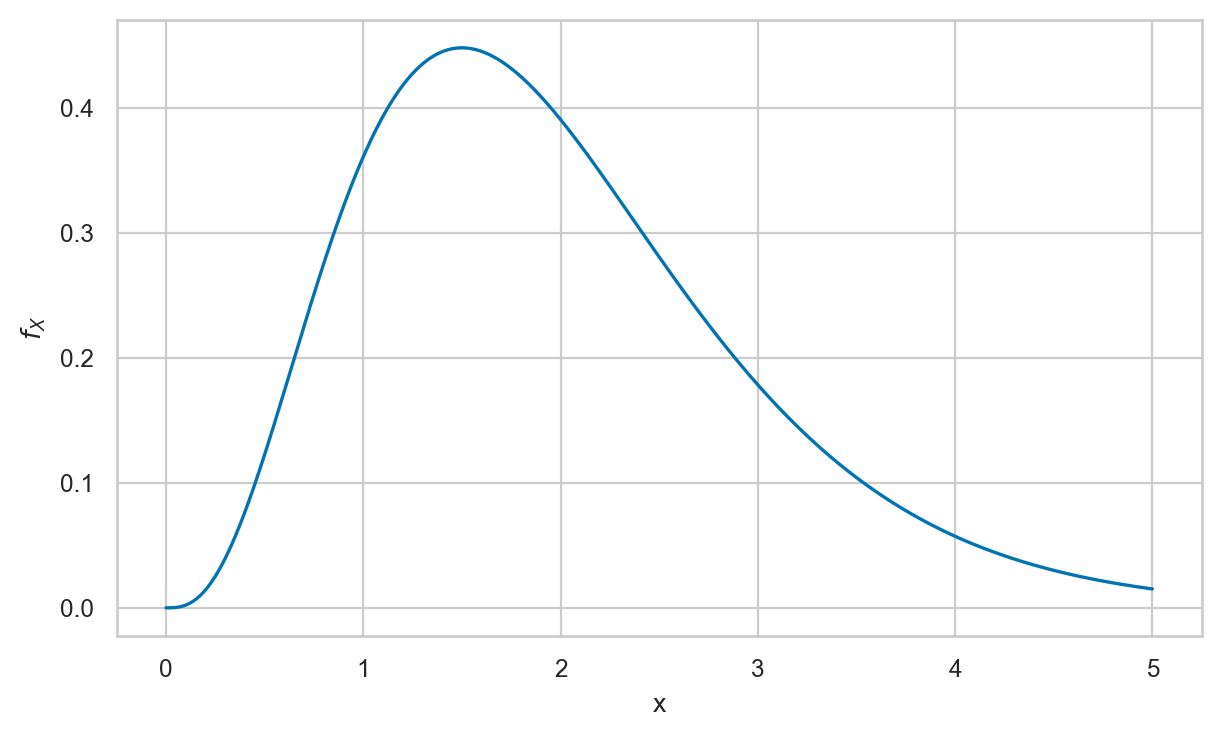

In [64]:
plot_pdf(rvG, xlims=[0,5]);

### Beta (optional)

In [65]:
from scipy.stats import beta as betad

alpha = 3
beta = 7

rvB = betad(alpha, beta)

In [66]:
rvB.mean(), rvB.var()

(0.3, 0.019090909090909092)

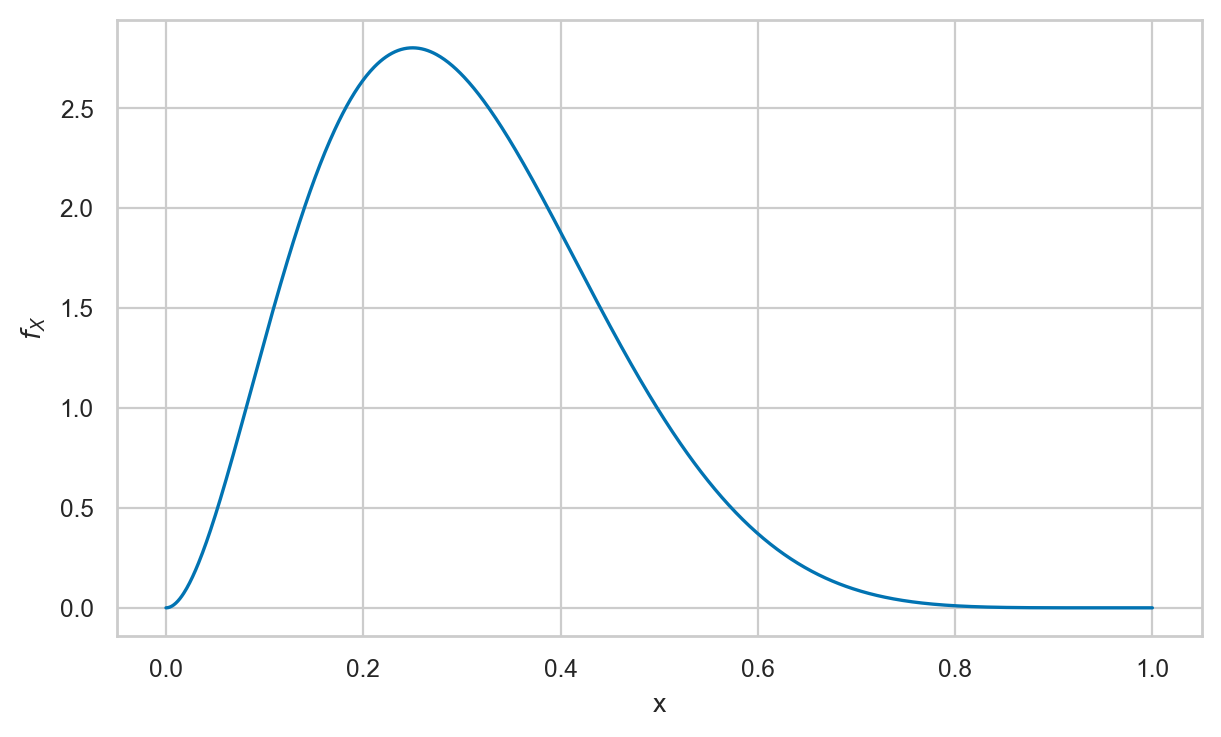

In [67]:
plot_pdf(rvB, xlims=[0,1]);

### Cauchy (optional)

In [68]:
from scipy.stats import cauchy

x0 = 3
gamma = 5

rvC = cauchy(x0, gamma)

In [69]:
rvC.mean(), rvC.var()

(nan, nan)

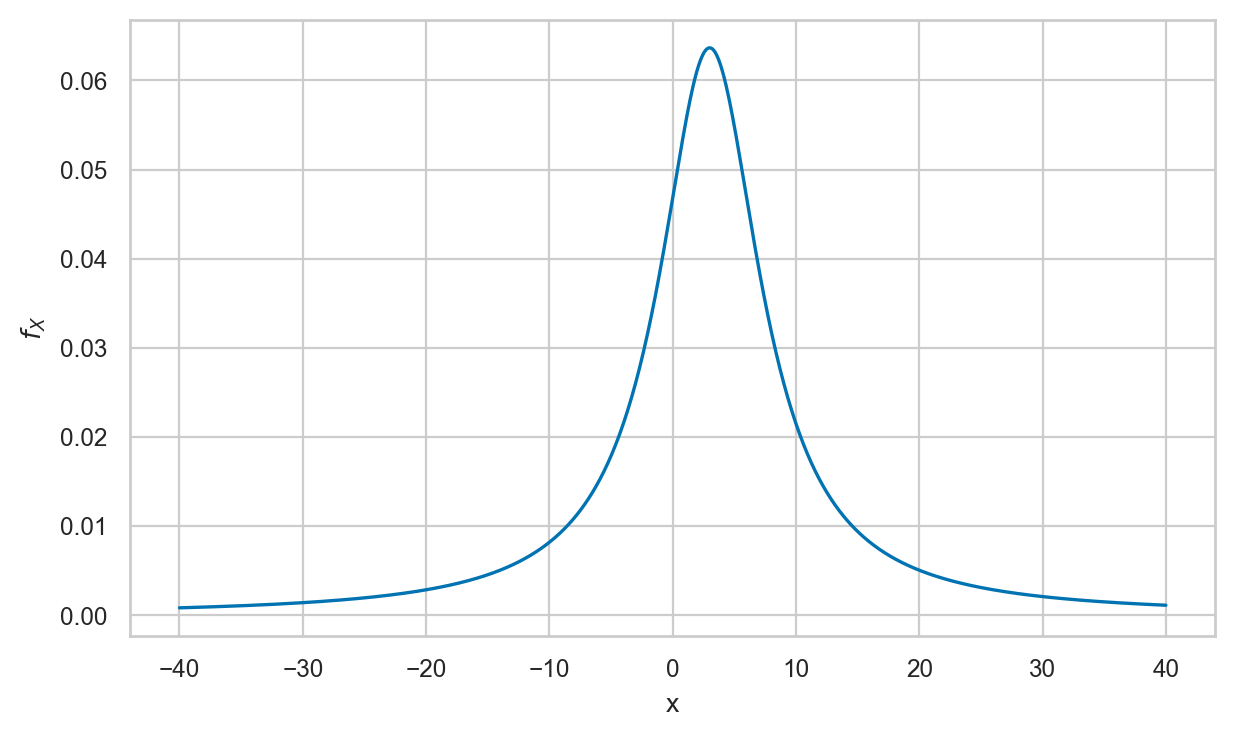

In [70]:
plot_pdf(rvC, xlims=[-40,40]);